# Normal Distribution

The **normal distribution**, also called the Gaussian distribution, is the most recognized probability distribution in all of math for good reason. It creates that familiar bell-shaped curve defined by a mean and standard deviation, where the mean indicates where most values occur and the standard deviation describes how spread out the values are. It is seen across nature, engineering, and other sciences and even shows up in non-normal datasets due to the central limit theorem. 

Let's bring in Pandas and get started. Let's also bring in matplotlib to do some visualizations. Finally, let's bring in the lightbulb dataset as a Series using `squeeze()`. 

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
import numpy as np 

X = pd.read_csv("https://raw.githubusercontent.com/thomasnield/machine-learning-demo-data/master/distribution/lightbulb_data.csv") \
    .squeeze()
X

0      701
1      697
2      617
3      708
4      676
      ... 
145    726
146    651
147    618
148    677
149    603
Name: lightbulb_life_hours, Length: 150, dtype: int64

## Probability Density Function

The normal distribution is a symmetrical bell-shaped distribution that has most mass around the mean, and its spread is defined through the standard deviation. The “tails” on either side become thinner as you move further away from the mean.

Let's plot the lightbulb life datapoints on a numberline. There is no number line in matplotlib, so we will hack a scatterplot by making all the y-values "0". Let's also get the mean and standard deviation of the data. 

MEAN: 672.2, STD: 51.48062775022316


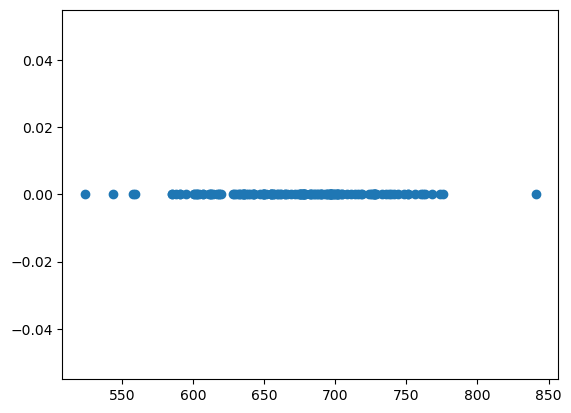

In [32]:
mean = data.mean()
std = data.std()

print(f"MEAN: {mean}, STD: {std}")

plt.plot(X, [0 for _ in data], 'o') # use a scatterplot to make numberline 

We can see clearly that there are more points around the center near the mean of 672.2, but as we get further away from the mean in either direction we see less and less datapoints. We can capture this density of points along the x-axis by projecting that density to the y-axis. We call this the **probability density function** of the normal distribution. If the data is normally distributed, the place where most points are clustered should be around the mean. The standard deviation will capture the spread. Those happen to be the arguments for Scipy's `norm.pdf()` function. 

Let's take a look. 

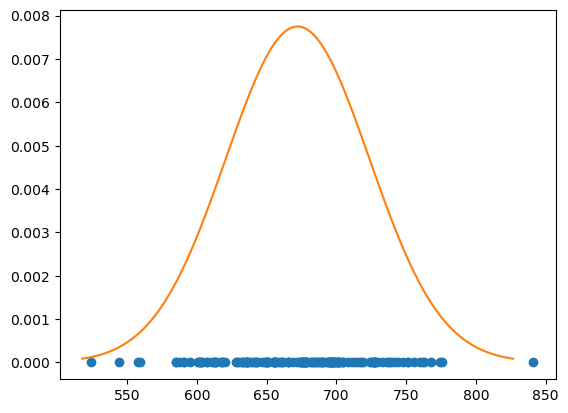

In [35]:
# have axis range capture ± 3 standard deviations around mean 
x_range = np.arange(mean-std*3, mean+std*3, .01) 

# plot scatterplot and the normal PDF 
plt.plot(X, [0 for _ in data], 'o') # scatterplot
plt.plot(x_range, norm.pdf(x_range, mean, std)) # bell curve 
plt.show()

This bell curve helps us visualize how likely we are to see a given lightbulb lifespan. For example, we see it is reasonably likely to see a lightbulb have a life between 600 and 750 hours. It is most likely to be around 672.2 hours which is the mean, and the highest point of the bell curve.  It is extremly unlikely to see a bulb with a lifespan of around 850 hours for 500 hours, because those values are on the tails. 


## Cumulative Density Function 

This brings up an important point in how to interpret the normal distribution. The area under the entire curve is 1.0, which means it models probablity (hence the name *probability* density function). Since there is an infinite number of points on the bell curve (because it is a continuous function and decimals can have infinite numbers of digits), it is unreasonable to ask the probablity of a specific value, like "what is the probability a lightbulb will last exactly 675 hours?" Paradoxically, that probability is 0 because there are an infinite number of values on the curve. 

Instead, we model probablity questions with *ranges* of values, like "what is the probability a light bulb will last between 650 and 700 hours?" This question we can answer by calculating the area under the bell curve for that range, as shaded below. 

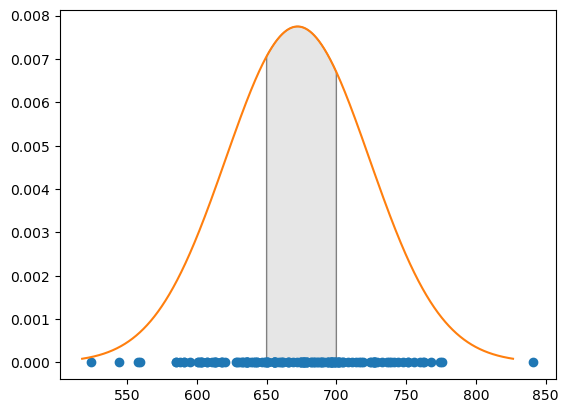

In [46]:
from matplotlib.patches import Polygon


fig, ax = plt.subplots()
ax.plot(X, [0 for _ in data], 'o') # scatterplot
ax.plot(x_range, norm.pdf(x_range, mean, std)) # bell curve 

a,b = 650, 700
ix = np.linspace(a, b)
iy =  norm.pdf(ix, mean, std)
verts = [(a, 0), *zip(ix, iy), (b, 0)]
poly = Polygon(verts, facecolor='0.9', edgecolor='0.5')
ax.add_patch(poly)

plt.show()

So how do we calculate the shaded area? We will need another tool,

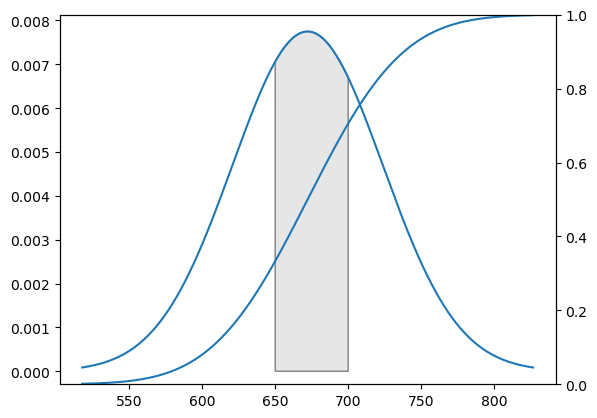

In [52]:
from matplotlib.patches import Polygon


fig, ax = plt.subplots()
ax.plot(x_range, norm.pdf(x_range, mean, std)) # bell curve 


ax2 = ax.twinx()  
ax2.set_ylim(0, 1.0);

ax2.plot(x_range, norm.cdf(x_range, mean, std)) # cumulative density function 

a,b = 650, 700
ix = np.linspace(a, b)
iy =  norm.pdf(ix, mean, std)
verts = [(a, 0), *zip(ix, iy), (b, 0)]
poly = Polygon(verts, facecolor='0.9', edgecolor='0.5')
ax.add_patch(poly)

plt.show()